# Multi-Omics Analysis: Breast Cancer Example
Referance: [ABZU Research](https://www.abzu.ai/research/multi-omics-analysis-made-easy-a-breast-cancer-example/)

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Function to Generate Mock Omics Data
def generate_mock_omics_data(n_samples=100, n_features=50, seed=42):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, random_state=seed)
    return pd.DataFrame(X), pd.Series(y)

In [ ]:
# Simulate Genomics, Transcriptomics, and Proteomics Data
genomics, labels = generate_mock_omics_data()
transcriptomics, _ = generate_mock_omics_data(seed=7)
proteomics, _ = generate_mock_omics_data(seed=99)

In [ ]:
#  Rename Columns to Prevent Collision
genomics.columns = [f'gen_{i}' for i in range(genomics.shape[1])]
transcriptomics.columns = [f'trans_{i}' for i in range(transcriptomics.shape[1])]
proteomics.columns = [f'prot_{i}' for i in range(proteomics.shape[1])]

In [ ]:
# Combine All Omics Data
merged_data = pd.concat([genomics, transcriptomics, proteomics], axis=1)
print("Shape of merged multi-omics data:", merged_data.shape)

Shape of merged multi-omics data: (100, 150)


In [ ]:
#  Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data)

In [ ]:
#  PCA for Dimensionality Reduction
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

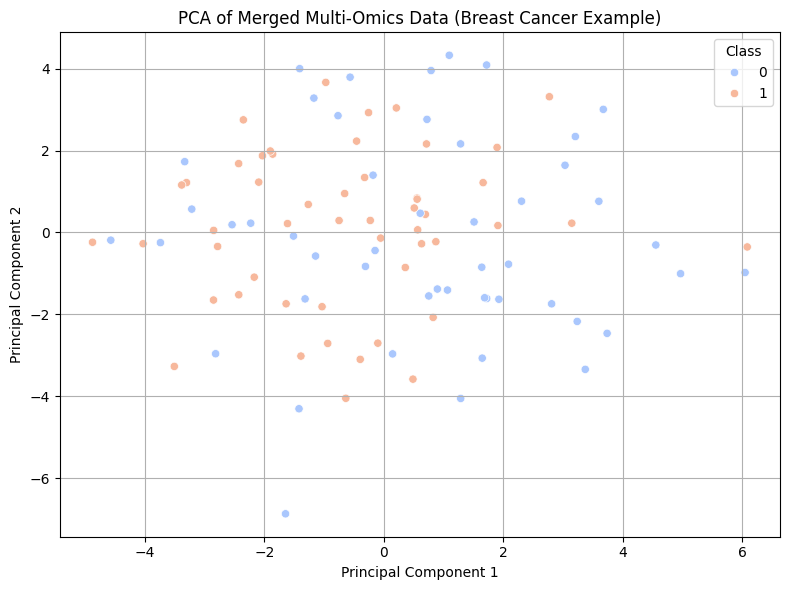

In [ ]:
#  Visualize the Result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette='coolwarm')
plt.title("PCA of Merged Multi-Omics Data (Breast Cancer Example)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()